# <font color='magenta'>Welcome</font> to the <font color='green'>BoloCalc</font><font color='blue'>+</font> simulation workbook for the <font color='orange'>CMB-S4 Collaboration</font>!

### Author: Alec Hryciuk 
### University of Chicago Graduate Student
### Contact: <u><font color='blue'>hryciuk@uchicago.edu</font></u>

### Press <strong><font color='green'>Shift-Enter</font></strong> to <b>evaluate</b> all the cells in a decending order or hit run all to generate the interface. <font color='orange'>Note:</font> This interface and it's modules need to be in the same directory as Bolocalc. If it is not then you may run into FileNotFound Errors when trying to run calcBolos simulations because the interface is searching in the wrong directory.


# <font color='green'>Import</font> necessary <font color='blue'>packages</font>:

## You must run the cell below to generate any of the interfaces later on!

### Here we just need to <font color='green'>import</font> the necessary <font color='blue'>python packages</font> for displaying the interface. You may need to change the directory in "sys.path.append()" to where you have dumped the project. 

### If you want the notebook to look nicer (no giant blocks of code), it was coded with a CodeFolder extension to the IPython Notebook. You should be able to enable it by going to the Nbextensions tab in the home directory of Jupyter and checking the box.

In [1]:
import ipywidgets as ipw
from ipywidgets import interact, interact_manual, Layout, Button, Box, HBox, VBox
import IPython.display as display
import sys, os
#sys.path.append('/home/ahryciuk/BoloCalc')
from BoloCalcConverters import TeleCamNames, AppendFiles, runCalcBolos
from N_ell_calculator import S4_noise
import pandas as pd
import json

global cwd
cwd = os.getcwd()

#Add where the project path is on your system
#sys.path.append('Enter path here')

# <font color='green'>Save</font> Path to <font color='blue'>Experimental Directory</font>:

### Enter the path to the <font color='blue'>experimental directory</font> you want to simulate. <font color='green'>Click</font> 'Run Interact' to save the path for the coming code.

In [2]:
#Save Experimental Path (run the above cell to import necessary packages)
def save_path(path):
    global exp_dir
    exp_dir = path
    try:
        print('Path saved as ' + exp_dir)
        global telescope_names, camera_names
        telescope_names, camera_names = TeleCamNames.TeleCamNames(exp_dir)
        print('Your telescope names are:')
        print(telescope_names)
        print('with camera names:')
        print(camera_names)
    except:
        print('Are you sure you input a valid path?')
    return
interact_manual(save_path,path='')

<function __main__.save_path>

# <font color='green'>Run</font> a <font color='blue'>BoloCalc Simulation</font>:

### Here is where you will <font color='green'>run</font> a <font color='blue'>BoloCalc simulation</font> of the experiment you just entered.

### For details on how calcBolos runs simulations  <a href="https://github.com/chill90/BoloCalc/blob/master/MANUAL/BoloCalc_User_Manual.pdf"> click here</a>

In [3]:
#Run to Generate Simulation Interface

#Import simulation from Bolocalc to get value of status bar?
    
#Instantiate command classes
run_sim = runCalcBolos.runCalcBolos()
ap = AppendFiles.AppendFiles()

################################################################################# 
    
#Button Click Definitions:
def appfiles(a):
    try:
        ap.InputConvert(exp_dir)
    except NameError:
        print('Please Enter an Experimental Path')
    return
def appinput(a):
    try:
        ap.AppendInputs(exp_dir)
    except NameError:
        print('Please Enter an Experimental Path')
    return
def convout(a):
    try:
        ap.ConvertOutputFiles(exp_dir)
    except NameError:
        print('Please Enter an Experimental Path')
    return
def savefiles_in(a):
    try:
        a=0
        ap.SaveFiles(exp_dir, save_in_to.value, save_in_name.value, a)
    except NameError:
        print('Please Enter an Experimental Path')
    return
def savefiles_out(a):
    try:
        a=1
        ap.SaveFiles(exp_dir, save_out_to.value, save_out_name.value, a)
    except NameError:
        print('Please Enter an Experimental Path')
    return
def runsim(a):
    try:
        run_sim.runSim(exp_dir,cwd)
    except NameError:
        print('Enter a path to your experiment.')
    return
def saveplotparams(a):
    try:
        print('Saving plot parameters. Shift-Enter the next cell to display')
        os.chdir(exp_dir)# + '/' + 'OutputExcelFiles')
        plot_params_set = pd.read_excel('OutputExcelFiles.xlsx',sheet_name='N_ell_Plotting_Parameters')

        global plot_params_names
        global plot_params_values
        plot_params_names=[]
        plot_params_values=[]
        for i in range(len(plot_params_set)):
            plot_params_names.append(plot_params_set.iloc[i,0])
            plot_params_values.append(plot_params_set.iloc[i,1])

        for i in range(len(plot_params_values)):
            if type(plot_params_values[i]) is str:
                plot_params_values[i] = json.loads(plot_params_values[i])
        print('Done!')
    except NameError:
        print('Enter a path to your experiment.')
    return

################################################################################# 

#Title of this block of interface
title = ipw.HTML("<b><font size=6><font color='green'>Simulations!</font></b>")

#The button to run a simulation
run_bolocalc_layout = Layout(width='400px',height='100px')
run_bolocalc = ipw.Button(description = 'Run calcBolos', layout=run_bolocalc_layout, button_style='primary')
    
#Run Simulation button click definition:
#if a simulation has not been run---button click = run simulation
#if SimulationCheck.SimulationCheck.(exp_dir) == True:
#    run_bolocalc.on_click(runCalcBolos.runCalcBolos(exp_dir))
#else:
#    print('You have previously ran a simulation')
#    print('The output files will be overwritten')
#    print('If you still want to proceed click run calcBolos')
#    run_bolocalc.on_click(runCalcBolos.runCalcBolos(exp_dir))

#Text box display of current experimental directory
try:
    display_exp_path = ipw.Text(description = 'Current Experiment', value=exp_dir)
    
except NameError:
    display_exp_path = ipw.Text(description='Current Experiment',value='Null')
    print('Did you enter a path to your experiment?')
    
#Progress bar for viewing pleasure
sim_progress = ipw.IntProgress(value=0,
                               min=0,
                               max=100,
                               step=0.5,
                               description='Simulation Progress',
                               bar_style='success',
                               orientation='horizontal')

#sim_progress.value = Simulation._bar_len

#################################################################################

#Additional buttons
add_box_layout = Layout(display = 'flex',
                   flex_flow = 'column',
                    justify_content='space-between',
                    align_items = 'stretch',
                   border = 'solid',
                   width = '300px',
                    height = '75px')
append_input_button = ipw.Button(description='Convert Input Files to Excel',layout=add_box_layout)
append_input_button.style.button_color='green'
convert_output_button = ipw.Button(description='Convert Output files to Excel',layout=add_box_layout)
convert_output_button.style.button_color='orange'
save_output_button = ipw.Button(description='Overwrite the Input Files',layout=add_box_layout)
save_output_button.style.button_color='lightblue'
plots_button = ipw.Button(description='Save Plot Parameters From Excel',layout=add_box_layout)
plots_button.style.button_color='red'

#################################################################################

#save to path and name
save_layout = Layout(width = '200px',height='75px')
save_in_button = ipw.Button(description='Save Input Files',layout=save_layout, button_style='info')
save_out_button = ipw.Button(description='Save Output Files',layout=save_layout, button_style='info')
save_buttons = VBox([save_in_button,save_out_button])

save_in_to = ipw.Text(description='Save Input to:',placeholder='Path to save to')
save_in_name = ipw.Text(description='Input Directory Name:')
save_out_to = ipw.Text(description='Save Output to:',placeholder='Path to save to')
save_out_name = ipw.Text(description='Output Directory Name:')
save_to = VBox([save_in_to, save_in_name, save_out_to, save_out_name])

save_int = HBox([save_buttons, save_to])
save_int.layout.margin = '0 0 0 275px'

add_buttons = HBox([VBox([append_input_button,convert_output_button]),VBox([save_output_button,plots_button])])
add_buttons.layout.margin = '0 0 0 175px'

#################################################################################

#Button Click Execution Commands:
save_in_button.on_click(savefiles_in)
save_out_button.on_click(savefiles_out)
append_input_button.on_click(appfiles)
save_output_button.on_click(appinput)
convert_output_button.on_click(convout)
run_bolocalc.on_click(runsim)
plots_button.on_click(saveplotparams)

#################################################################################

#Formatting and Display
display_col = VBox([display_exp_path,sim_progress])

run_sim_row = HBox([run_bolocalc,display_col])
run_sim_row.layout.margin = '25px 0 0 150px'
total_layout=Layout(border='solid 15px blue')
total = VBox([title,run_sim_row, add_buttons, save_int],layout=total_layout,)
total



Saving plot parameters. Shift-Enter the next cell to display
Done!


# <font color='green'>Calculate and Plot</font>  <font color='blue'>N($\ell$)</font>:

### The interface displays the plotting parameters that you input when you clicked <font color = 'red'>'Save Plot Parameters from Excel'</font> above. The button at the bottom will <font color='green'>calculate</font> the N($\ell$) curves for <font color='blue'>temperature</font> and <font color='blue'>polarization</font>.  There is a <font color='green'>download</font> button in the bottom left corner of the generated plot interface so you can download the <font color='blue'>figures</font> you become attached to. There is also the ability to <font color='green'>zoom</font> in on parts of the plot and <font color='green'>pan</font> if you so desire it.

#### <font color='orange'>Note: If you change the values in the text boxes, you do</font> <font color='red'>NOT</font> <font color='orange'> change the parameters that go into calculating N($\ell$)</font>. Instead go back to the N_ell_Plotting_Parameters sheet in OutputExcelFiles.xlsx, make your changes and save, then <font color='green'>click</font> <font color='red'>'Save Plot Parameters from Excel'</font> again and <font color='green'>Shift-Enter</font> on this cell to update the calculator with your new values.

band centers:  [27.0, 39.0, 93.0, 145.0, 225.0, 280.0] [GHz]
beam sizes:  [8.6, 5.9, 2.6, 1.4, 1.2, 1.0] [arcmin]
sky area:  16501.18449976771 degrees^2
white noise level:  [60.92386971227154, 32.2730490672355, 6.753946745559417, 8.489597864529994, 18.890927396331925, 45.17723782132109] [uK-arcmin]


<IPython.core.display.Javascript object>


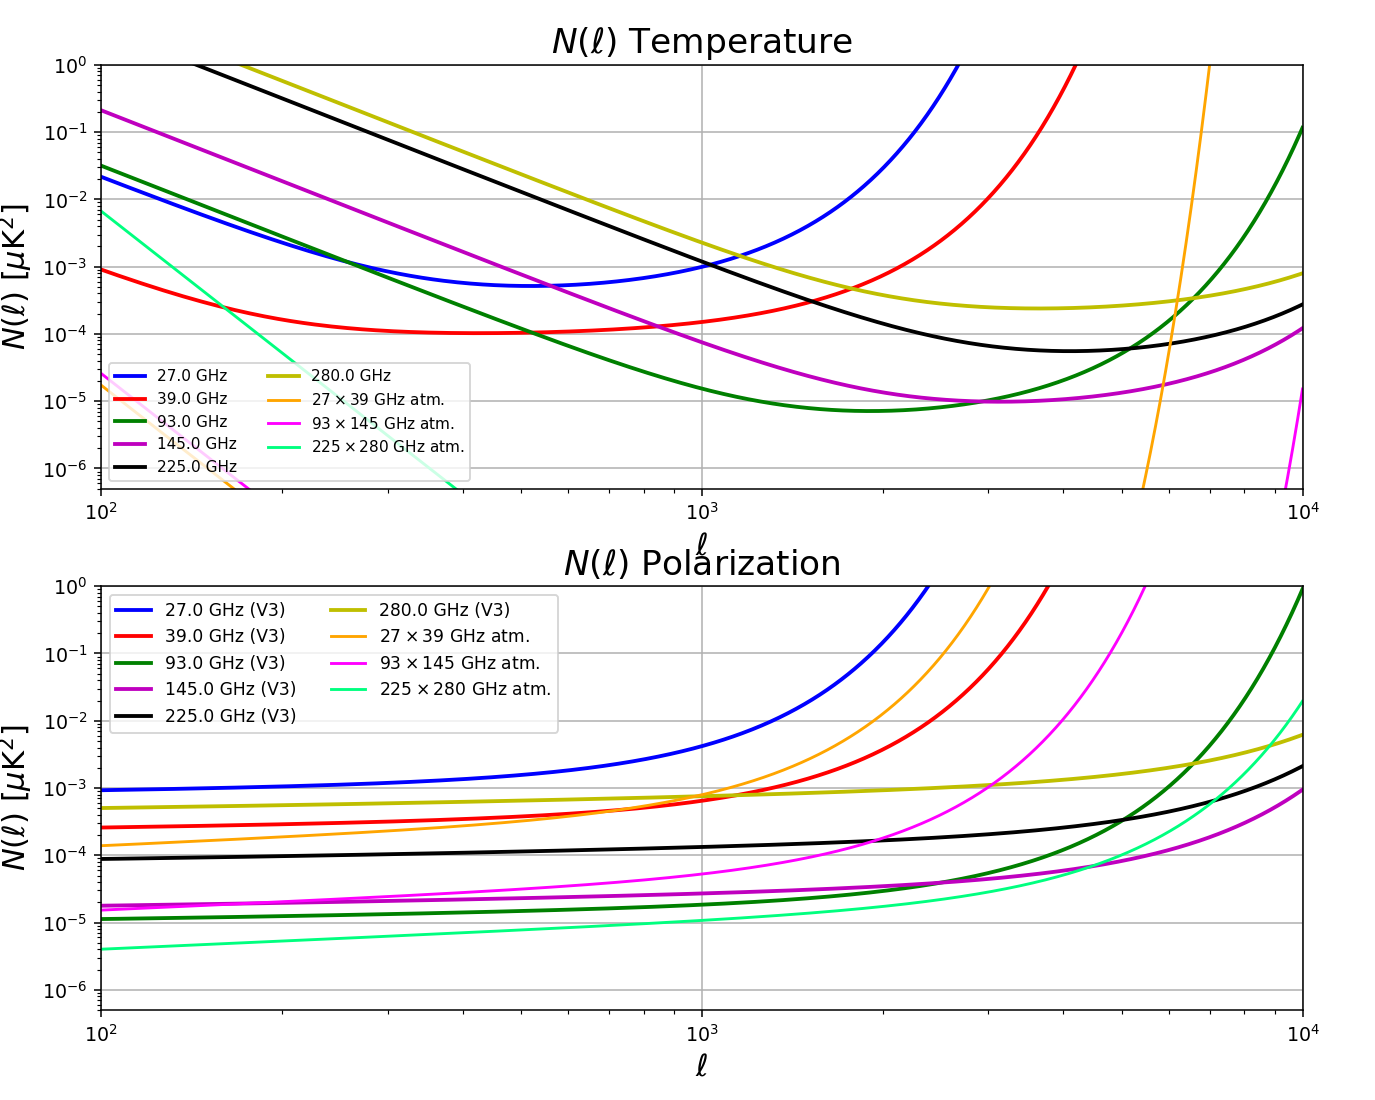

In [4]:
#Code for N(ell) interface

def N_ell_calculator(a):
    %matplotlib notebook
    import matplotlib.pyplot as plt
    import matplotlib as pltt
    import subprocess
    display.clear_output()

    ell, N_ell_T_LA, N_ell_P_LA, Map_white_noise_levels = S4_noise(band_centers=plot_params_values[0],
                                                              beam_sizes=plot_params_values[1],Sens=plot_params_values[17],
                                                              f_knees=plot_params_values[2],Cs=plot_params_values[3],
                                                              alpha_temp=plot_params_values[4],
                                                               survey_time=plot_params_values[5],f_sky=plot_params_values[6],
                                                               ret_after_obs_cuts=plot_params_values[7],
                                                               non_uniformity_param=plot_params_values[8],
                                                               ell_max=plot_params_values[9],ell_pivot=plot_params_values[10],
                                                               delta_ell=plot_params_values[11],
                                                               alpha_pol=plot_params_values[12],NTubes_LF=plot_params_values[13],
                                                               NTubes_MF=plot_params_values[14],NTubes_UHF=plot_params_values[15],
                                                                  model_num=plot_params_values[16])


    band_centers = plot_params_values[0]

    colors = ['b','r','g','m','k','y']

    fig, (plt1,plt2) = plt.subplots(2,1,figsize=(10,8))
    fig.tight_layout(pad=3.0)
    for i in range(0,len(band_centers)):
        plt1.loglog(ell,N_ell_T_LA[0][i], label=str(band_centers[i]) + ' GHz', color=colors[i], ls='-', lw=2.)
        #plt.loglog(ell,N_ell_V3_T_white[i], color=colors[i], ls='-', lw=0.5) #white noise


    # include correlated atmospheric noise across frequencies
    plt1.loglog(ell, N_ell_T_LA[1][0], label=r'$27 \times 39$ GHz atm.', color='orange', lw=1.5)
    plt1.loglog(ell, N_ell_T_LA[1][1], label=r'$93 \times 145$ GHz atm.', color='fuchsia', lw=1.5)
    plt1.loglog(ell, N_ell_T_LA[1][2], label=r'$225 \times 280$ GHz atm.', color='springgreen', lw=1.5)
    plt1.set_title('$N(\ell$) Temperature', fontsize=18)
    plt1.set_ylabel('$N(\ell$) [$\mu$K${}^2$]', fontsize=16)
    plt1.set_xlabel('$\ell$', fontsize=16)
    plt1.set_ylim(5e-7,1)
    plt1.set_xlim(100,10000)
    plt1.legend(loc='lower left', ncol=2, fontsize=8)
    plt1.grid()
    #plt.savefig('V3_calc_mode'+str(mode)+'_fsky'+str(fsky)+'_defaultdist_noise_LAT_T.pdf')
    #plt.close()

    ## plot the polarization noise curves

    for i in range(len(band_centers)):
        plt2.loglog(ell,N_ell_P_LA[0][i], label=str(band_centers[i])+' GHz (V3)', color=colors[i], ls='-', lw=2.)
        #plt.loglog(ell,N_ell_V3_T_white[i], color=colors[i], ls='-', lw=0.5) #white noise
        i+=1
    # include correlated atmospheric noise across frequencies
    plt2.loglog(ell, N_ell_P_LA[1][0], label=r'$27 \times 39$ GHz atm.', color='orange', lw=1.5)
    plt2.loglog(ell, N_ell_P_LA[1][1], label=r'$93 \times 145$ GHz atm.', color='fuchsia', lw=1.5)
    plt2.loglog(ell, N_ell_P_LA[1][2], label=r'$225 \times 280$ GHz atm.', color='springgreen', lw=1.5)
    plt2.set_title(r"$N(\ell$) Polarization", fontsize=18)
    plt2.set_ylabel(r"$N(\ell$) [$\mu$K${}^2$]", fontsize=16)
    plt2.set_xlabel(r"$\ell$", fontsize=16)
    plt2.set_ylim(5e-7,1)
    plt2.set_xlim(100,10000)
    plt2.legend(loc='upper left', ncol=2, fontsize=9)
    plt2.grid()

    return

#############Text Box inputs to calculation################

try:
    params = [0 for i in range(len(plot_params_names))]
    for i in range(len(plot_params_names)):
        params[i] = ipw.Text(description=plot_params_names[i],value=str(plot_params_values[i]))
except NameError:
    params = [0 for i in range(18)]
    for i in range(len(params)):
        params[i] = ipw.Text(description='')
    print('Save your plot parameters with the red button in the previous section')
    print('Then try Shift-Enter on this cell again.')
    
####################Display###############################

params_box1=HBox(params[0:3])
params_box2=HBox(params[3:6])
params_box3=HBox(params[6:9])
params_box4=HBox(params[9:12])
params_box5=HBox(params[12:15])
params_box6=HBox(params[15:])
params_box = VBox([params_box1,params_box2,params_box3,params_box4,params_box5,params_box6])

plot_layout = Layout(width='600px',height='100px')
plot_button = ipw.Button(description = 'Plot N(ell)', layout=plot_layout, button_style='danger')
plot_button.layout.margin = '0px 0px 0px 175px'
plot_button.on_click(N_ell_calculator)

##################Run Interact button#####################
plots = VBox([params_box,plot_button])

plots


    


band centers:  [27.0, 39.0, 93.0, 145.0, 225.0, 280.0] [GHz]
beam sizes:  [7.4, 5.1, 2.2, 1.4, 1.0, 0.9] [arcmin]
sky area:  4125.296124941928 degrees^2
white noise level:  [99.67854503764728, 54.70590153293011, 14.974243120327584, 15.63976503678659, 50.945702704936735, 81.34341623920173] [uK-arcmin]
2000
0.0003806523658859001


<IPython.core.display.Javascript object>


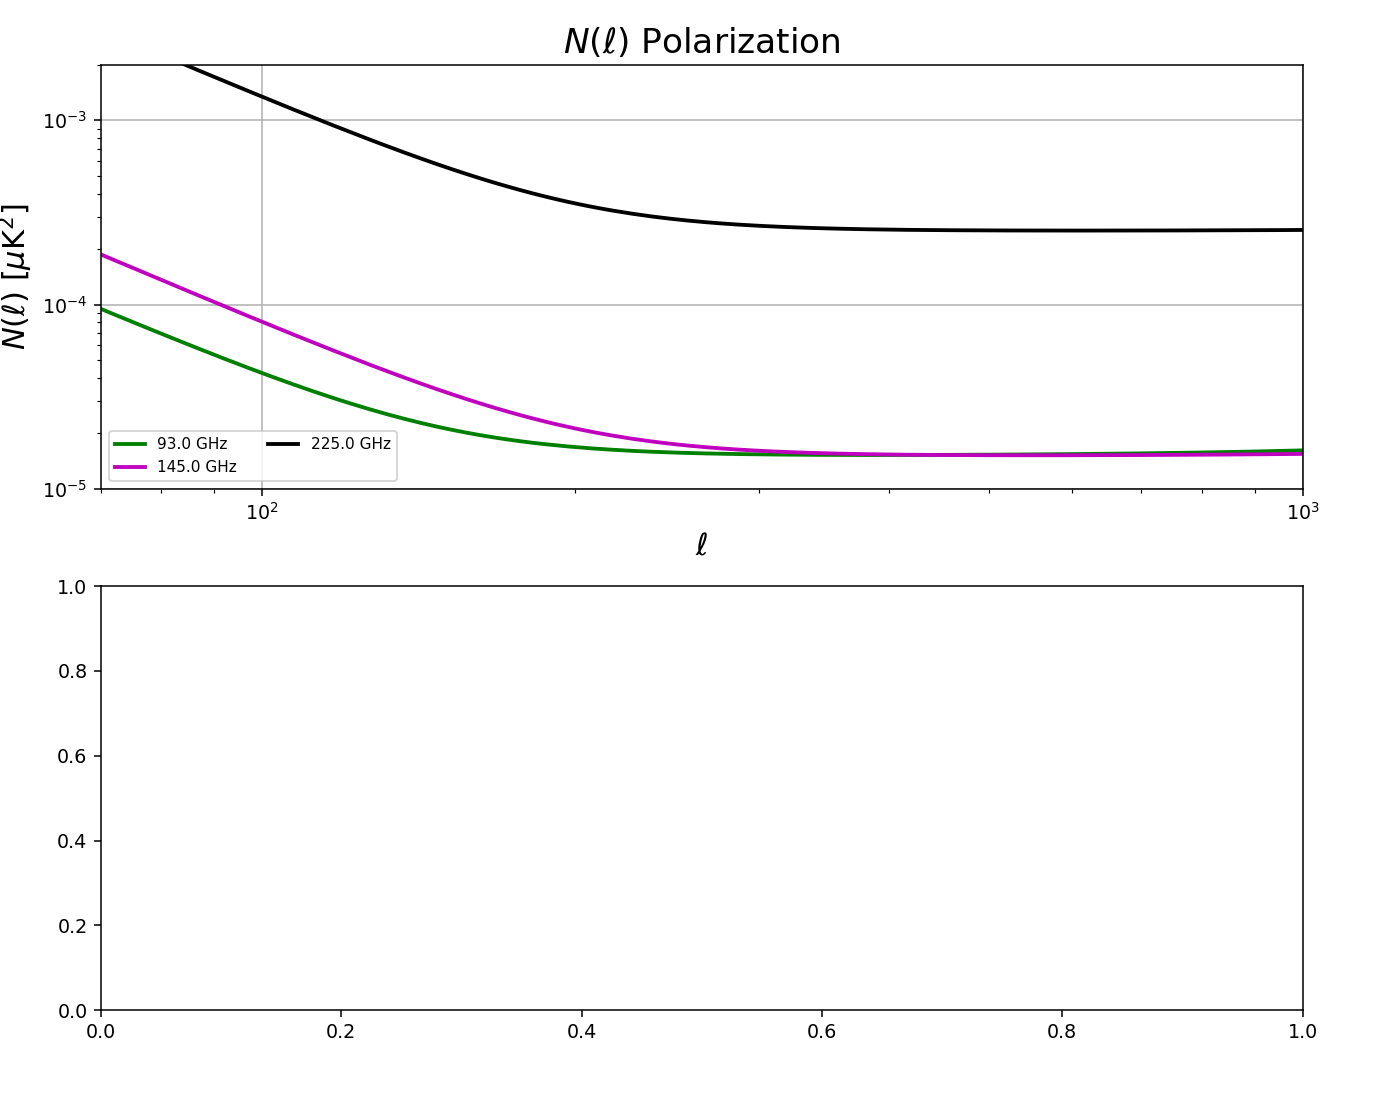

In [35]:
import matplotlib.pyplot as plt
import numpy as np

ell, N_ell_T_LA, N_ell_P_LA, Map_white_noise_levels = S4_noise(band_centers=plot_params_values[0],
                                                              beam_sizes=plot_params_values[1],Sens=plot_params_values[2],
                                                              f_knees=plot_params_values[3],Cs=plot_params_values[4],
                                                              alpha_temp=plot_params_values[5],
                                                               survey_time=plot_params_values[6],f_sky=plot_params_values[7],
                                                               ret_after_obs_cuts=plot_params_values[8],
                                                               non_uniformity_param=plot_params_values[9],
                                                               ell_max=plot_params_values[10],ell_pivot=plot_params_values[11],
                                                               delta_ell=plot_params_values[12],
                                                               alpha_pol=plot_params_values[13],NTubes_LF=plot_params_values[14],
                                                               NTubes_MF=plot_params_values[15],NTubes_UHF=plot_params_values[16],
                                                              model_num=plot_params_values[17])

band_centers = plot_params_values[0]

colors = ['b','r','g','m','k','y']

fig, (plt1,plt2) = plt.subplots(2,1,figsize=(10,8))
fig.tight_layout(pad=3.0)
for i in range(2,5):
    plt1.loglog(ell,N_ell_P_LA[0][i], label=str(band_centers[i]) + ' GHz', color=colors[i], ls='-', lw=2.)
    #plt.loglog(ell,N_ell_V3_T_white[i], color=colors[i], ls='-', lw=0.5) #white noise

plt1.set_title('$N(\ell$) Polarization', fontsize=18)
plt1.set_ylabel('$N(\ell$) [$\mu$K${}^2$]', fontsize=16)
plt1.set_xlabel('$\ell$', fontsize=16)
plt1.set_ylim(1e-5,2e-3)
plt1.set_xlim(70,1000)
plt1.legend(loc='lower left', ncol=2, fontsize=8)
plt1.grid()
#plt.savefig('V3_calc_mode'+str(mode)+'_fsky'+str(fsky)+'_defaultdist_noise_LAT_T.pdf')
#plt.close()

In [39]:
#Package N_ells into dictionary

ell, N_ell_T_LA, N_ell_P_LA, Map_white_noise_levels = S4_noise(band_centers=plot_params_values[0],
                                                              beam_sizes=plot_params_values[1],Sens=plot_params_values[2],
                                                              f_knees=plot_params_values[3],Cs=plot_params_values[4],
                                                              alpha_temp=plot_params_values[5],
                                                               survey_time=plot_params_values[6],f_sky=plot_params_values[7],
                                                               ret_after_obs_cuts=plot_params_values[8],
                                                               non_uniformity_param=plot_params_values[9],
                                                               ell_max=plot_params_values[10],ell_pivot=plot_params_values[11],
                                                               delta_ell=plot_params_values[12],
                                                               alpha_pol=plot_params_values[13],NTubes_LF=plot_params_values[14],
                                                               NTubes_MF=plot_params_values[15],NTubes_UHF=plot_params_values[16],
                                                              model_num=plot_params_values[17])

TParr = ['T','P']
which_spec_arr = ['TT','EE']
#freqarr = [93,145,225,280]
freqarr = band_centers
specs_dic = {}
nl_dic = {}

for TP in TParr:
    nl_dic[TP] = {}
    for freq1 in freqarr:
        for freq2 in freqarr:
            if freq1 == freq2:
                if TP == 'T':
                    nl_dic[TP][(freq1,freq2)] = N_ell_T_LA[0][freqarr.index(freq1)]
                elif TP == 'P':
                    nl_dic[TP][(freq1,freq2)] = N_ell_P_LA[0][freqarr.index(freq1)]
            else:
                if TP == 'T':
                    nl_dic[TP][(freq1,freq2)] = N_ell_T_LA[1][freqarr.index(freq1)]
                elif TP == 'P':
                    nl_dic[TP][(freq1,freq2)] = N_ell_P_LA[1][freqarr.index(freq1)]








band centers:  [27.0, 39.0, 93.0, 145.0, 225.0, 280.0] [GHz]
beam sizes:  [7.4, 5.1, 2.2, 1.4, 1.0, 0.9] [arcmin]
sky area:  4125.296124941928 degrees^2
white noise level:  [99.67854503764728, 54.70590153293011, 14.974243120327584, 15.63976503678659, 50.945702704936735, 81.34341623920173] [uK-arcmin]


In [41]:
print(nl_dic['P'].keys())

dict_keys([(27.0, 27.0), (27.0, 39.0), (27.0, 93.0), (27.0, 145.0), (27.0, 225.0), (27.0, 280.0), (39.0, 27.0), (39.0, 39.0), (39.0, 93.0), (39.0, 145.0), (39.0, 225.0), (39.0, 280.0), (93.0, 27.0), (93.0, 39.0), (93.0, 93.0), (93.0, 145.0), (93.0, 225.0), (93.0, 280.0), (145.0, 27.0), (145.0, 39.0), (145.0, 93.0), (145.0, 145.0), (145.0, 225.0), (145.0, 280.0), (225.0, 27.0), (225.0, 39.0), (225.0, 93.0), (225.0, 145.0), (225.0, 225.0), (225.0, 280.0), (280.0, 27.0), (280.0, 39.0), (280.0, 93.0), (280.0, 145.0), (280.0, 225.0), (280.0, 280.0)])


In [43]:
print(N_ell_P_LA[0][2])
print(nl_dic['P'][(93,93)])

[0.47450248 0.02346804 0.00643697 ... 0.02374521 0.02392105 0.02409829]
[0.47450248 0.02346804 0.00643697 ... 0.02374521 0.02392105 0.02409829]


<IPython.core.display.Javascript object>


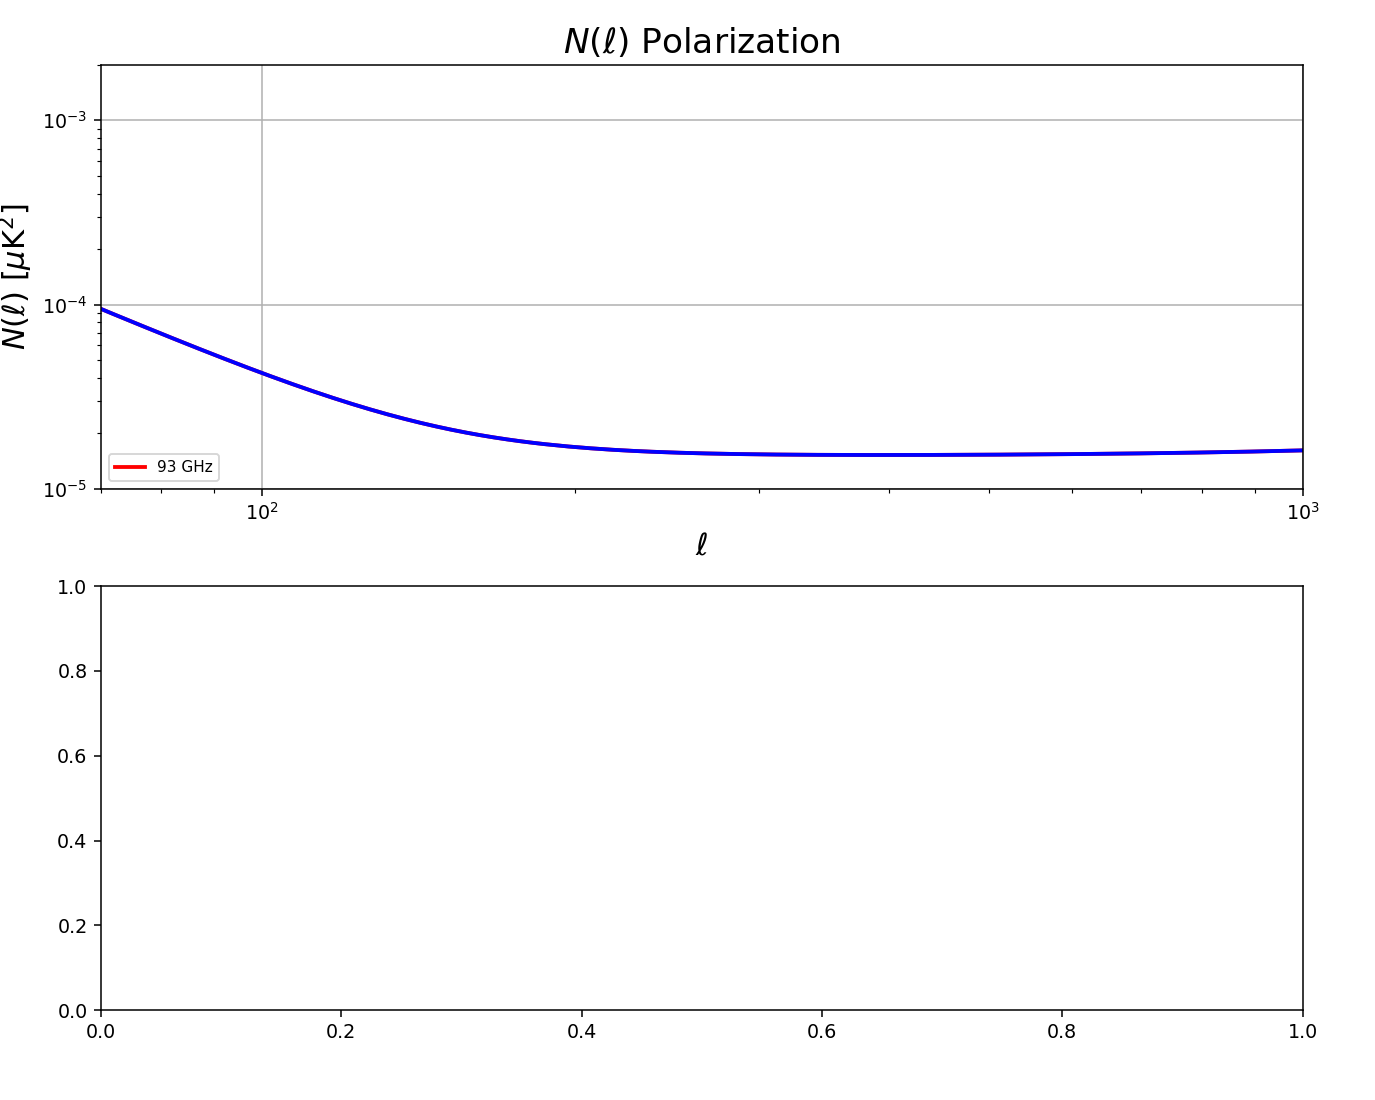

In [44]:
fig, (plt1,plt2) = plt.subplots(2,1,figsize=(10,8))
fig.tight_layout(pad=3.0)

plt1.loglog(ell,nl_dic['P'][(93,93)], label=str(93) + ' GHz', color='red', ls='-', lw=2.)
plt1.loglog(ell,N_ell_P_LA[0][2],color='blue',ls='-',lw=2.)
    #plt.loglog(ell,N_ell_V3_T_white[i], color=colors[i], ls='-', lw=0.5) #white noise

plt1.set_title('$N(\ell$) Polarization', fontsize=18)
plt1.set_ylabel('$N(\ell$) [$\mu$K${}^2$]', fontsize=16)
plt1.set_xlabel('$\ell$', fontsize=16)
plt1.set_ylim(1e-5,2e-3)
plt1.set_xlim(70,1000)
plt1.legend(loc='lower left', ncol=2, fontsize=8)
plt1.grid()
#plt.savefig('V3_calc_mode'+str(mode)+'_fsky'+str(fsky)+'_defaultdist_noise_LAT_T.pdf')
#plt.close()

## generate cl spectrum

In [ ]:
which_spec = ['TT','EE']


In [19]:
import pandas as pd
import os

exp_dir = '/mnt/c/Users/12622/Desktop/CMB_Research/S4/Noise_Modelling/V3_baseline_2/V3_baseline_2'


os.chdir(exp_dir+'/'+'LAT')

f = open('sensitivity.txt','r')
f_read = f.readlines()

col_header = f_read[0].split('|')
for i in range(len(col_header)):
    col_header[i] = col_header[i].strip(' ')
print(col_header)


sens_frame = pd.read_csv('sensitivity.txt',sep='|',comment='-',skiprows=[0,1,2],names=col_header)

sens_list = list(sens_frame['Array NET_CMB'])
for i in range(len(sens_list)):
    sens_list[i] = sens_list[i].rstrip(' +/')
    sens_list[i] = sens_list[i].lstrip(' ')
    sens_list[i] = float(sens_list[i])


print(sens_list)

['Chan', 'Num Det', 'Array NET_CMB', 'Array NET_RJ', 'CMB Map Depth', 'RJ Map Depth           \n']
[48.44, 25.66, 5.37, 6.75, 15.02, 35.92, 3.96]


In [1]:
#os.chdir()
import os
print(os.getcwd())

/home/ahryciuk/CMBS4_Noise_Modeling
